In [6]:
import sys
print(sys.executable)

c:\Program Files\Python312\python.exe


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Carregar o dataset
dataset = pd.read_csv('../../data/resultado.csv', sep=';', quotechar='"', low_memory=False)

In [9]:
# Exibir os nomes das colunas
print("Nomes das colunas no dataset:")
print(dataset.columns.tolist())

Nomes das colunas no dataset:
['sintomas', 'profissionalSaude', 'racaCor', 'outrosSintomas', 'outrasCondicoes', 'profissionalSeguranca', 'cbo', 'condicoes', 'sexo', 'estado', 'estadoIBGE', 'municipio', 'municipioIBGE', 'origem', 'estadoNotificacao', 'municipioNotificacao', 'municipioNotificacaoIBGE', 'evolucaoCaso', 'classificacaoFinal', 'codigoEstrategiaCovid', 'codigoBuscaAtivaAssintomatico', 'outroBuscaAtivaAssintomatico', 'codigoTriagemPopulacaoEspecifica', 'outroTriagemPopulacaoEspecifica', 'codigoLocalRealizacaoTestagem', 'outroLocalRealizacaoTestagem', 'codigoRecebeuVacina', 'codigoLaboratorioPrimeiraDose', 'codigoLaboratorioSegundaDose', 'lotePrimeiraDose', 'loteSegundaDose', 'codigoContemComunidadeTradicional', 'source_id', 'excluido', 'validado', 'codigoDosesVacina', 'estadoNotificacaoIBGE', 'totalTestesRealizados', 'dataNotificacao', 'dataInicioSintomas', 'dataEncerramento', 'dataPrimeiraDose', 'dataSegundaDose', 'codigoEstadoTeste1', 'codigoTipoTeste1', 'codigoFabricanteTes

In [10]:
# Limpar os valores da coluna 'estadoNotificacaoIBGE' (remover espaços e converter para maiúsculas)
dataset['estadoNotificacaoIBGE'] = dataset['estadoNotificacaoIBGE'].str.strip().str.upper()

In [11]:
# Limpar os valores da coluna 'sexo' (remover espaços e converter para capitalizado)
dataset['sexo'] = dataset['sexo'].str.strip().str.capitalize()

In [12]:
# Exibir valores únicos de sexo para verificar se existem valores diferentes de Feminino e Masculino
print("Valores únicos na coluna 'sexo':", dataset['sexo'].unique())

Valores únicos na coluna 'sexo': ['Feminino' 'Masculino' 'Ba' 'Indefinido' 'Sc' nan]


In [13]:
# Filtrar os estados válidos e remover entradas inválidas
estados_selecionados = ['PR', 'SC', 'PA', 'TO', 'SP', 'ES', 'GO', 'MS', 'BA', 'SE']
dataset_filtrado = dataset[dataset['estadoNotificacaoIBGE'].isin(estados_selecionados)]

In [14]:
# Contar registros com idade NaN
registros_sem_idade = dataset_filtrado['idade'].isna().sum()

In [15]:
# Contar registros com valores inválidos na coluna 'sexo'
registros_invalidos_sexo = dataset_filtrado[~dataset_filtrado['sexo'].isin(['Feminino', 'Masculino'])].shape[0]

In [16]:
# Remover entradas onde 'idade' é NaN
dataset_filtrado = dataset_filtrado[dataset_filtrado['idade'].notna()]

In [17]:
# Remover entradas com valores inválidos na coluna 'sexo'
dataset_filtrado = dataset_filtrado[dataset_filtrado['sexo'].isin(['Feminino', 'Masculino'])]

In [18]:
# Verificar se o dataset filtrado não está vazio
if dataset_filtrado.empty:
    print("\nNenhum dado encontrado para os estados selecionados.")
else:
    # Recalcular o total de registros
    total_registros = len(dataset_filtrado)

    # Log para verificar total de registros e registros inválidos
    print(f"\nTotal de registros filtrados: {total_registros}")
    print(f"Número de registros sem idade: {registros_sem_idade}")
    print(f"Número de registros inválidos na coluna 'sexo': {registros_invalidos_sexo}")

    # Calcular a taxa de dados inválidos na coluna 'sexo'
    taxa_invalidez = (registros_invalidos_sexo / (total_registros + registros_invalidos_sexo) * 100) if (total_registros + registros_invalidos_sexo) > 0 else 0
    print(f"\nTaxa de dados inválidos na coluna 'sexo': {taxa_invalidez:.2f}%")

    # Calcular a distribuição percentual de sexo por estado
    print("\nDistribuição por Sexo em cada Estado:")
    distribuicao_sexo_estado = dataset_filtrado.groupby(['estadoNotificacaoIBGE', 'sexo']).size().unstack(fill_value=0)
    distribuicao_percentual = distribuicao_sexo_estado.div(distribuicao_sexo_estado.sum(axis=1), axis=0) * 100

    for estado in distribuicao_percentual.index:
        print(f"\nEstado: {estado}")
        for sexo in ['Feminino', 'Masculino']:
            if sexo in distribuicao_percentual.columns:
                print(f"  - Percentual de {sexo}: {distribuicao_percentual.loc[estado, sexo]:.1f}%")
            else:
                print(f"  - Percentual de {sexo}: Não disponível")
    
    # Calcular a média das idades por estadoNotificacaoIBGE e sexo
    media_idade = dataset_filtrado.groupby(['estadoNotificacaoIBGE', 'sexo'])['idade'].mean().reset_index()

    # Formatar e exibir os resultados das médias de idade
    print("\nMédia das Idades por Estado e Sexo:")

    # Definir estados mais e menos populosos
    estados_populosos = {
        'Sul': {'Mais Populoso': 'PR', 'Menos Populoso': 'SC'},
        'Norte': {'Mais Populoso': 'PA', 'Menos Populoso': 'TO'},
        'Sudeste': {'Mais Populoso': 'SP', 'Menos Populoso': 'ES'},
        'Centro-Oeste': {'Mais Populoso': 'GO', 'Menos Populoso': 'MS'},
        'Nordeste': {'Mais Populoso': 'BA', 'Menos Populoso': 'SE'}
    }

    for regiao, estados in estados_populosos.items():
        print(f"\n{regiao}: {estados['Mais Populoso']} x {estados['Menos Populoso']}")
        print("-" * 40)  # Linha separadora
        
        for estado in [estados['Mais Populoso'], estados['Menos Populoso']]:
            idade_estado = media_idade[media_idade['estadoNotificacaoIBGE'] == estado]
            if not idade_estado.empty:
                for sexo in ['Feminino', 'Masculino']:
                    idade_sexo = idade_estado[idade_estado['sexo'] == sexo]['idade'].values
                    print(f"  {estado}:")
                    # Arredondar a média de idade para o inteiro mais próximo
                    print(f"    - Média Idade {sexo}: {round(idade_sexo[0])}" if len(idade_sexo) > 0 else f"    - Média Idade {sexo}: Não disponível")
            else:
                print(f"  {estado}: (sem dados)")


Total de registros filtrados: 2005120
Número de registros sem idade: 658748
Número de registros inválidos na coluna 'sexo': 5

Taxa de dados inválidos na coluna 'sexo': 0.00%

Distribuição por Sexo em cada Estado:

Estado: BA
  - Percentual de Feminino: 56.4%
  - Percentual de Masculino: 43.6%

Estado: ES
  - Percentual de Feminino: 49.7%
  - Percentual de Masculino: 50.3%

Estado: GO
  - Percentual de Feminino: 59.6%
  - Percentual de Masculino: 40.4%

Estado: MS
  - Percentual de Feminino: 62.2%
  - Percentual de Masculino: 37.8%

Estado: PA
  - Percentual de Feminino: 58.3%
  - Percentual de Masculino: 41.7%

Estado: PR
  - Percentual de Feminino: 59.9%
  - Percentual de Masculino: 40.1%

Estado: SC
  - Percentual de Feminino: 57.6%
  - Percentual de Masculino: 42.4%

Estado: SE
  - Percentual de Feminino: 56.9%
  - Percentual de Masculino: 43.1%

Estado: SP
  - Percentual de Feminino: 59.0%
  - Percentual de Masculino: 41.0%

Estado: TO
  - Percentual de Feminino: 64.3%
  - Percen

In [19]:
# Visualizações gráficas
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Frequência')

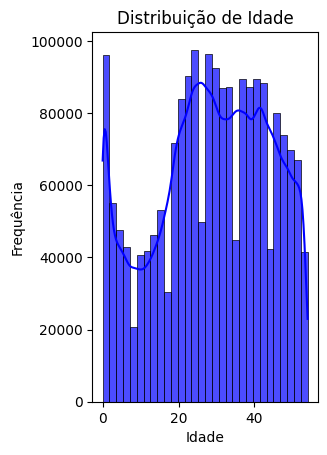

In [20]:
# Gráfico de Distribuição de Idade Geral
plt.subplot(1, 2, 1)
sns.histplot(dataset_filtrado['idade'], bins=30, kde=True, color='blue', alpha=0.7)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')

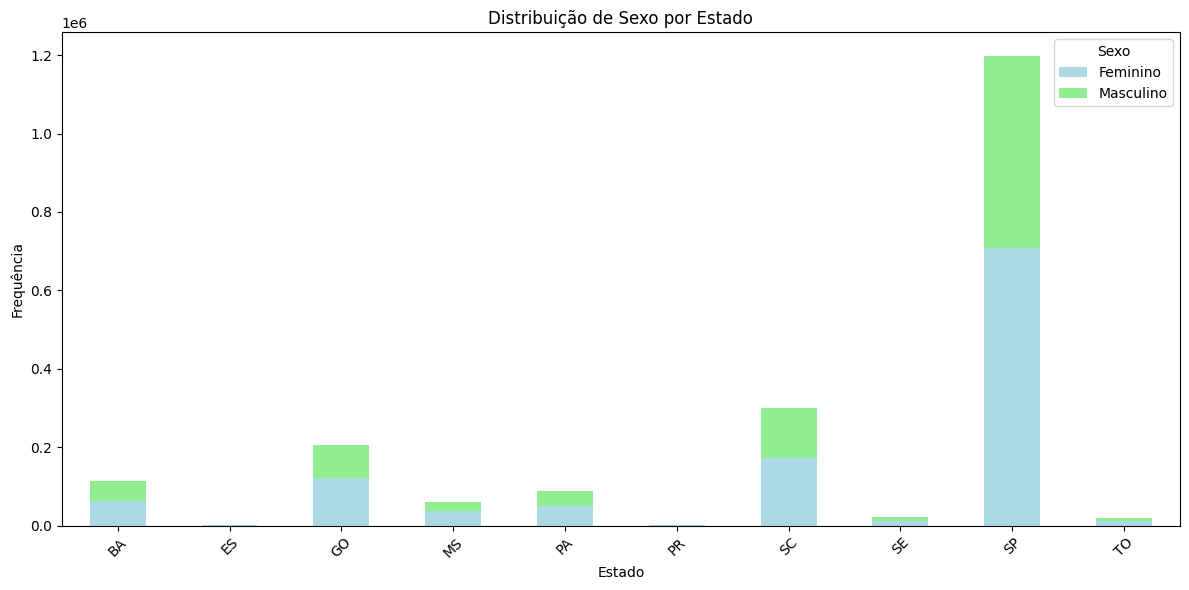

In [23]:
# Gráfico de Distribuição de Sexo por Estado
distribuicao_sexo_estado.plot(kind='bar', stacked=True, figsize=(12, 6), color=['lightblue', 'lightgreen'])
plt.title('Distribuição de Sexo por Estado')
plt.xlabel('Estado')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.tight_layout()

In [22]:
# Exibir os gráficos
plt.show()